# Test: change saliency map to densities
has to be moved outside of notebooks dir to be used

In [21]:
import os
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
import skimage
import pysaliency
import pysaliency.external_datasets
from pysaliency.utils import MatlabOptions
from saliency_model.itti_koch import IttiKoch
from pysaliency import optimize_for_information_gain, Stimuli, Fixations

In [3]:
plt.rcParams['image.cmap'] = 'gray'
MatlabOptions.matlab_names = ['matlab', 'matlab.exe', '/usr/local/MATLAB/R2017b/bin/matlab']
MatlabOptions.octave_names = []

## Load The Image

In [4]:
path = './imgs/biden.jpg'
img = mpimg.imread(path)
# img = skimage.img_as_float(img)

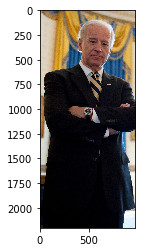

In [5]:
plt.imshow(img);

In [62]:
img.all()

False

## Initiate and run IK model and Faces detection featre

In [6]:
IK = IttiKoch(verbose=False)
saliency, _ = IK.run(img)
saliency_face_only, _ = IK.run(img, keys = [], faces=True)

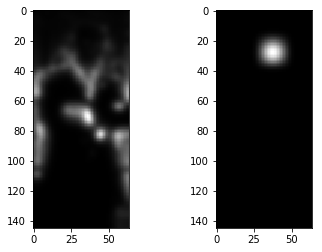

In [7]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(saliency);
ax[1].imshow(saliency_face_only);

## Initiate and run other models

In [8]:
aim = pysaliency.AIM(location='test_models', cache_location=os.path.join('model_caches', 'AIM'))

## Change saliency maps into densities

In [10]:
# stimulus = np.random.randn(100, 100, 3)
# stimuli = Stimuli([stimulus])

In [21]:
stimuli = Stimuli([img])

In [22]:
rst = np.random.RandomState(seed=42)
N = 100
fixations = Fixations.create_without_history(
        x = rst.rand(N)*100,
        y = rst.rand(N)*100,
        n = np.zeros(N, dtype=int)
    )

In [23]:
smc, res = optimize_for_information_gain(
        aim,
        stimuli,
        fixations,
#         optimize=optimize,
        blur_radius=3,
        verbose=2,
        maxiter=10,
        return_optimization_result=True)

100%|██████████| 1/1 [09:14<00:00, 554.05s/it]


Caching saliency maps


Preparing fixations: 100%|██████████| 1/1 [00:00<00:00, 2874.78it/s]

1 (100.0%)


Compiling theano function
Using density constraints on log scale
  NIT    FC           OBJFUN            GNORM
blur_radius:  3.0
nonlinearity: [-8.         -7.57894737 -7.15789474 -6.73684211 -6.31578947 -5.89473684
 -5.47368421 -5.05263158 -4.63157895 -4.21052632 -3.78947368 -3.36842105
 -2.94736842 -2.52631579 -2.10526316 -1.68421053 -1.26315789 -0.84210526
 -0.42105263  0.        ]
centerbias:   [1.1        1.08181818 1.06363636 1.04545455 1.02727273 1.00909091
 0.99090909 0.97272727 0.95454545 0.93636364 0.91818182 0.9       ]
alpha:        1.0
    1     1     2.561849E+00     1.316319E+00
blur_radius:  3.007533504427766
nonlinearity: [-7.67460404 -7.51496959 -7.1375739  -6.71450732 -6.26222523 -5.84739676
 -5.45990543 -5.01297574 -4.58485049 -4.16408605 -3.70692334 -3.35209374
 -2.93069804 -2.51174528 -2.24434952 -1.8513559  -1.4029461  -0.92996077
 -0.42158997  0.11935539]
centerbias:   [1.05565985 0.97216635 0.98747343 0.86904596 0.85881063 0.82374941
 0.74508961 0.67669938 0.79

In [24]:
smc

In [41]:
smc.sample(stimuli, 2)

1


In [43]:
smc.log_likelihoods(stimuli, fixations)


array([-11.94505534, -10.73469909, -11.1373308 ,  -9.96238548,
       -11.91014182, -11.97028908, -11.97566594, -10.34452135,
       -11.22795233, -11.87872782, -11.99461919, -11.9627906 ,
       -11.36744503, -11.9065907 , -11.9278504 , -11.90659026,
       -11.75728945, -11.90171254, -11.64840146, -10.53891911,
       -10.87701208, -11.91515231, -10.03735749, -11.9394075 ,
       -11.19723425, -11.20045603, -11.9097912 , -11.18970953,
       -11.90542079, -11.9684839 , -10.13421667, -11.96796234,
       -12.00232538, -11.33427704, -11.25963254, -11.16591531,
       -10.14800418, -11.94038276, -11.01580491, -11.84698713,
       -11.91114524, -10.87792036, -11.97252212, -11.26649039,
       -10.16030648, -11.8896926 , -10.99296512,  -9.97532725,
       -11.9100923 , -11.58086043, -10.76386441, -11.21269809,
       -11.91741994, -11.35491828, -11.54533474, -11.27749175,
       -11.9452136 , -11.91419458, -11.99503278, -11.23143958,
       -10.01479185, -11.20406975, -10.19799382, -10.00

In [25]:
res

        alpha: 1.0114396913461183
  blur_radius: 2.9531991468904284
   centerbias: array([1.00000000e-07, 1.00006836e-07, 1.00011462e-07, 1.00002251e-07,
       1.00002315e-07, 1.00002142e-07, 1.00001533e-07, 1.00001352e-07,
       1.00002200e-07, 1.00014034e-07, 6.54596791e+00, 5.45403109e+00])
          fun: -4.694577189073154
          jac: array([ 4.32061328e-03, -1.35360925e-01, -1.05525162e-02,  4.22202182e-03,
        1.15911125e-03,  6.46177205e-03,  1.52228340e-02,  2.56880495e-02,
        3.38436900e-02,  1.14420070e-02,  6.68077650e-03, -4.43654753e-04,
        2.36496503e-03, -1.72082736e-02, -1.23989789e-02,  3.58785816e-02,
        2.76251701e-02,  5.37460525e-03,  6.92003750e-07,  3.18610138e-08,
        4.04828793e-08,  2.13063504e-01,  5.76826630e-01,  4.06588023e-01,
        8.18996424e-01,  9.03397320e-01,  1.19286579e+00,  1.45434050e+00,
        1.76257876e+00,  1.08235190e+00,  4.93377371e-01,  3.91517824e-02,
       -4.69904182e-02, -1.39590152e-02])
      messag